In [1]:
import numpy as np 
import keras
from keras. utils import np_utils
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
y_train[0]

5

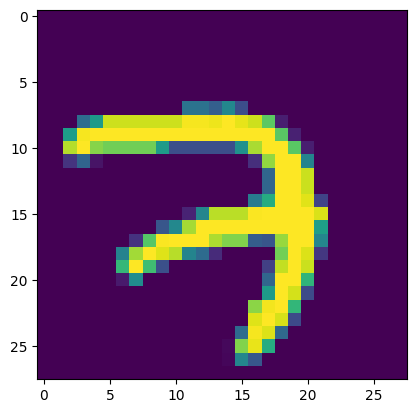

In [5]:
plt.imshow(x_train[5000])

In [6]:
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

In [7]:
number_of_classes = 10

In [8]:
y_train = np_utils.to_categorical (y_train, number_of_classes) 
y_test = np_utils.to_categorical (y_test, number_of_classes)

In [9]:
y_train[0] 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
model=Sequential ()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation = 'softmax'))

In [11]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 208s 111ms/step - loss: 0.2276 - accuracy: 0.9518 - val_loss: 0.0969 - val_accuracy: 0.9727
Epoch 2/5
1875/1875 [==============================] - 205s 109ms/step - loss: 0.0696 - accuracy: 0.9783 - val_loss: 0.0789 - val_accuracy: 0.9767
Epoch 3/5
1875/1875 [==============================] - 205s 109ms/step - loss: 0.0487 - accuracy: 0.9848 - val_loss: 0.1111 - val_accuracy: 0.9690
Epoch 4/5
1875/1875 [==============================] - 202s 108ms/step - loss: 0.0398 - accuracy: 0.9881 - val_loss: 0.1164 - val_accuracy: 0.9701
Epoch 5/5
1875/1875 [==============================] - 223s 119ms/step - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.0939 - val_accuracy: 0.9766


In [13]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.0939449667930603, 0.9765999913215637]


In [14]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 124ms/step
[[2.6926618e-12 1.1903354e-11 4.2952846e-12 4.9246626e-08 6.7641644e-04
  6.4230200e-08 1.7771170e-14 3.2892167e-06 2.6332597e-07 9.9931991e-01]]


In [15]:
import numpy as np
print(np.argmax(prediction, axis=1)) 
np.argmax(y_test[5000:5001]) 

[9]


3

In [16]:

model.save('D:\IBM - final project/mnistCNN.h5')